#FloPy3
##Export binary simulated heads to external files
Setup the environment...

This example is modified from notebooks within the flopy repo
https://github.com/modflowpy/flopy/tree/master/examples/Notebooks

In [1]:
%matplotlib inline
import sys
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set name of MODFLOW exe
#  assumes executable is in users path statement
version = 'mf2005'
exe_name = 'mf2005'
if platform.system() == 'Windows':
    exe_name = 'mf2005.exe'
mfexe = exe_name

#Set the paths
loadpth = os.path.join('..', 'data', 'freyberg')
modelpth = os.path.join('data')

#make sure modelpth directory exists
if not os.path.exists(modelpth):
    os.makedirs(modelpth)

###Load and Run an Existing Model
A model called the "Freyberg Model" is located in the loadpth folder.  In the following code block, we load that model, then change into a new workspace (modelpth) where we recreate and run the model.  For this to work properly, the MODFLOW-2005 executable (mf2005) must be in the path.  We verify that it worked correctly by checking for the presence of freyberg.hds and freyberg.cbc.

In [3]:
ml = flopy.modflow.Modflow.load('freyberg.nam', model_ws=loadpth, 
                                exe_name=exe_name, version=version)
ml.change_model_ws(new_pth=modelpth)
ml.write_input()
success, buff = ml.run_model()
if not success:
    print ('Something bad happened.')
files = ['freyberg.hds', 'freyberg.cbc']
for f in files:
    if os.path.isfile(os.path.join(modelpth, f)):
        msg = 'Output file located: {}'.format(f)
        print (msg)
    else:
        errmsg = 'Error. Output file cannot be found: {}'.format(f)
        print (errmsg)


changing model workspace...
   data
FloPy is using the following executable to run the model: /Users/brclark/brc/WRDAPP/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 x/x/2015                        

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2016/04/27  5:35:09

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2016/04/27  5:35:09
 Elapsed run time:  0.025 Seconds

  Normal termination of simulation
Output file located: freyberg.hds
Output file located: freyberg.cbc


###Visualize heads with matplotlib

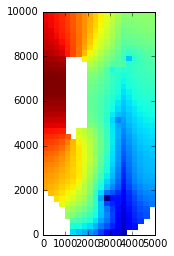

In [4]:
fname = os.path.join(modelpth, 'freyberg.hds')
hdobj = flopy.utils.HeadFile(fname)
head = hdobj.get_data()
modelmap = flopy.plot.ModelMap(model=ml)
quadmesh = modelmap.plot_array(head, masked_values=[999.])

###Export heads to numpy array file - which can be read by VisIt

https://wci.llnl.gov/simulation/computer-codes/visit/

In [5]:
np.save('freyberg.npy', head)

In [6]:
dis = ml.dis
print(dis.nrow, dis.ncol, dis.delr[0], dis.delc[0])

(40, 20, 250.0, 250.0)
